Class label [0 1 0 0 0]
분류기 [0 1 1 1 0]
0.6
0.6
[False  True False False False]
[False  True  True  True False]
[ True False  True  True  True]
[ True False False False  True]
1
2
2
0
판단 값의 정확성 파악 0.6
0.333333333333
0.333333333333
1.0
1.0
0.0853183948084
0.0853183948084
0.836029673734
0.836029673734
0.835816941926
0.835816941926


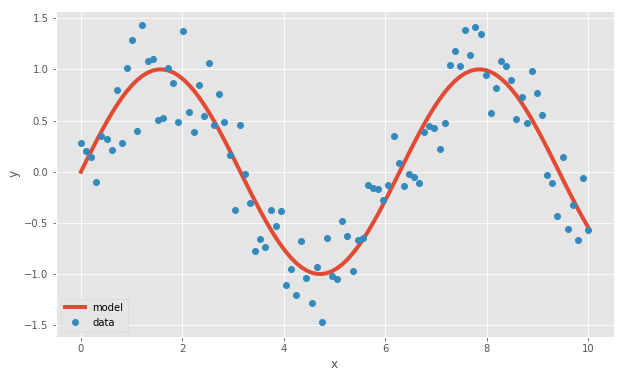

In [29]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

np.random.seed(42)
y_true = np.random.randint(0,2,size=5)
print("Class label",y_true)

###############################클래스 레이블이 두 개인 경우 분류기 점수 판별 법
###############################accuracy_score 개념
#정확도는 테스트 세트 크기 중에서 정확하게 분류된 예측 값이 얼마나 되는가
#y_pred라는 클래스 레이블을 예측하는 분류기를 가정해보자.
#y_pred = np.ones(5, dtype = np.int32)
y_pred = np.array([0,1,1,1,0])
print("분류기", y_pred)
#정확도는 다음과 같다.
#방법 1
print(np.sum(y_true == y_pred) / len(y_true))
#방법 2
print(metrics.accuracy_score(y_true, y_pred))

###############################precision_score 정확률 개념
#정확률은 분류기가 생각하는 값이 모든 테스트 세트 중에서 실제로 일치하는 비율
#진짜 참
truly_a_positive = (y_true == 1)
print(truly_a_positive)
#참인 것으로 판단
predicted_a_positive  = (y_pred ==1)
print(predicted_a_positive)
#진짜 거짓
truly_a_negative = (y_true == 0)
print(truly_a_negative)
#거짓인 것으로 판단
predicted_a_negative = (y_pred == 0)
print(predicted_a_negative)

#true positive / 참양성 판단
true_positive = np.sum(truly_a_positive * predicted_a_positive)
print(true_positive)
#false positive / 위양성 판단
false_positive = np.sum(truly_a_negative * predicted_a_positive)
print(false_positive)
#true nagative / 참음성 판단
true_negative = np.sum(truly_a_negative * predicted_a_negative)
print(true_negative)
#false negative / 위음성 판단
false_negative = np.sum(truly_a_positive * predicted_a_negative)
print(false_negative)

#위 판단 값들이 정확한지를 accuracy 계산을 통해 판단
test_accuracy =(true_positive + true_negative) / len(y_true)
print("판단 값의 정확성 파악",test_accuracy)

#분류기가 참이라고 생각하는 모든 테스트 세트 중에서 실제로 참이 들어있는 비율
precision = true_positive / (true_positive + false_positive)
print(precision)
print(metrics.precision_score(y_true, y_pred))

###############################recall_score 재현율 개념
#재현율은 실제로 참인것 중에서 진짜 참인 것
recall = true_positive / (true_positive + false_negative)
print(recall)
print(metrics.recall_score(y_true,y_pred))

############################### 회귀 모델 분석 법
#0과 10사이에 100개의 등 간격 x 값을 생성
x = np.linspace(0,10, 100)
y_true = np.sin(x) + np.random.rand(x.size) - 0.5

#우리의 모델이 sin(x) 관계를 파악할 만큼 똑똑하다 가정
y_pred = np.sin(x)
plt.style.use('ggplot')
%matplotlib inline
plt.figure(figsize = (10,6))
plt.plot(x, y_pred, linewidth=4, label='model')
plt.plot(x, y_true, 'o', label = 'data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower left')

###############################모델 예측이 얼마나 잘됐는지를 결정하는 가장 간단한 측정 기준은 '평균 제곱 오차'
#각 데이터 포인트에 대해 예측된 y 값과 실제 y 값의 차이를 확인 후 제곱해서 얻음
mse = np.mean((y_true-y_pred)**2)
print(mse)
print(metrics.mean_squared_error(y_true, y_pred))

###############################분산 Variation (or 산포 Scatter)
#또 다른 공통 척도. 모든 데이터 포인트가 모든 데이터 포인트의 평균과 같으면 데이터에 변동이 없으며,
#단일 데이터 값으로 향후 모든 데이터 포인트를 예측할 수 있다.
#예측된 레이블과 실제 레이블 사이에 존재하는 분산을 계산
fvu = np.var(y_true-y_pred) / np.var(y_true)
#이 분산 값은 1에서 빼서 분산의 분수 형태로, 데이터의 전체 분산으로 정규화 한 값으로 만든다
fve = 1.0 - fvu
print(fve)
print(metrics.explained_variance_score(y_true,y_pred))

###############################R^2 또는 결정 계수(coefficient of determination) 계산
r2 = 1.0 - mse / np.var(y_true)
print(r2)
print(metrics.r2_score(y_true, y_pred))
#1에 가까워 질수록 예측한 결과가 좋다는 것.

real data : [[  1.109  11.09 ]
 [  8.063  11.24 ]
 [  2.599  11.31 ]
 [  2.599  37.6  ]
 [ 38.23   11.12 ]]
result data : [1 1 1 0 2]
result_label : [1 1 1 0 2]